In [1]:
# Set up interactive plotting using matplotlib, and load numpy
# %pylab ipympl
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to load a pipeline from a file.

## Setup

Make sure you have PODPAC installed with the **datatype** optional dependencies:

```
$ pip install podpac[datatype]
```

# 1: Set up and execute pipeline
## 1.0: Define the pipeline json

In [2]:
import ipywidgets as widgets
import podpac
import podpac.datalib.gfs 

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


In [3]:
value='''
{
    "GFSSource": {
        "node": "datalib.gfs.GFSSource",
        "attrs": {
            "band": 1,
            "date": "20200205",
            "forecast": "384",
            "hour": "1200",
            "level": "10-40 m DPTH",
            "parameter": "SOIM"
        },
        "source": "SOIM/10-40 m DPTH/20191104/1200/384",
        "interpolation": "nearest"
    }
}        

'''
pipeline_json = widgets.Textarea(description='Pipeline Definition', 
                                 disabled=False, 
                                 layout=widgets.Layout(width='50%', height='400px'),
                                 placeholder='{}',
                                 value=value
                                )
pipeline_json

Textarea(value='\n{\n    "GFSSource": {\n        "node": "datalib.gfs.GFSSource",\n        "attrs": {\n       …

## 1.1: Create the pipeline

In [4]:
sm = podpac.Node.from_json(pipeline_json.value)

## 1.3: Evaluate and plot the node for the world

In [5]:
# dim =            (start, stop, step)
lat = podpac.crange(   90,  -90,-2.0)
lon = podpac.crange( -0,  360, 2.0)
# dim = value
time = '2018-05-19T12'

c_world = podpac.Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])
o = sm.eval(c_world)

INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/10-40 m DPTH/20200205/1200/384)


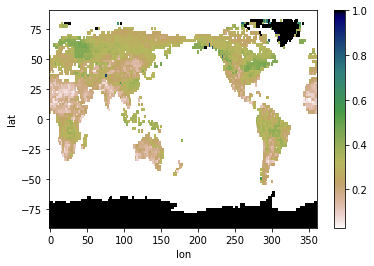

In [6]:
figure()
o.plot(cmap='gist_earth_r')